# <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Capstone Project


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Capstone Overview


## <span style="font-family: Arial; font-weight:normal;font-size:0.5em;color:#0e92ea"> Objective:

- To undertake a multi-faceted project that demonstrates your understanding and mastery of the key conceptual and technological aspects of Deep Learning.
- To develop an understanding of how challenging human-level problems can be approached and solved using a combination of tools and techniques.
- To understand current scenarios in deep learning, understand the practicalities and the trade-offs that need to be made when solving a problem in real life.

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Milestones:

## <span style="font-family: Arial; font-weight:normal;font-size:0.5em;color:#0e92ea"> This project has 2 milestones.

You get 3 weeks for completing each milestone.
The 1st milestone should be submitted as part of the interim report.

### <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#da614e"> 1st Milestone:

## <span style="font-family: Arial; font-weight:normal;font-size:0.5em;color:#0e92ea"> 1. Problem interpretation

- Understand the data
- Make an abstract or an overview based on your approach
- Break the problem into smaller tasks
- Discuss among your teammates and share responsibilities

## <span style="font-family: Arial; font-weight:normal;font-size:0.5em;color:#0e92ea"> 2. Data analysis and preprocessing:

Visual displays are powerful when used well, so think carefully about the information the display.

- Include any insightful visualization
- Share and explain particularly meaningful features, interactions or summary of data
- Display examples to input in your model
- Explain changes to be incorporated into data so that it becomes ready for the model

## <span style="font-family: Arial; font-weight:normal;font-size:0.5em;color:#0e92ea"> 3. Modeling

- What kind of neural network you have used and why?
- What progress you have made towards your intended solution?


### <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#da614e"> 2nd Milestone

## <span style="font-family: Arial; font-weight:normal;font-size:0.5em;color:#0e92ea"> 4. Model evaluation

- Describe how you will proceed with the analysis
- Compare different models and choose which model to use
- Do hyper-parameter tuning of your model
- How will you build on your initial analysis to increase the accuracy of your model?

## <span style="font-family: Arial; font-weight:normal;font-size:0.5em;color:#0e92ea"> 5. Presentation and Report

- You should start preparing the final report at least 2 weeks prior to the project completion date.
- Teams should send a draft Last of the project before the last session to the mentor and get the necessary inputs for submission.
- The expectations for the final report will be included in your Capstone course page


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Problem Statement


## <span style="font-family: Arial; font-weight:normal;font-size:0.5em;color:#0e92ea"> DOMAIN:

Health Care

## <span style="font-family: Arial; font-weight:normal;font-size:0.5em;color:#0e92ea"> CONTEXT:

Computer vision can be used in health care for identifying diseases. In Pneumonia detection we need to detect Inflammation of the lungs. In this challenge, you’re required to build an algorithm to detect a visual signal for pneumonia in medical images. Specifically, your algorithm needs to automatically locate lung opacities on chest radiographs

## <span style="font-family: Arial; font-weight:normal;font-size:0.5em;color:#0e92ea"> DATA DESCRIPTION:

    - In the dataset, some of the features are labeled “Not Normal No Lung Opacity”. This extra third class indicates that while pneumonia was determined not to be present, there was nonetheless some type of abnormality on the image and oftentimes this finding may mimic the appearance of true pneumonia.
    - Dicom original images: Medical images are stored in a special format called DICOM files (*.dcm). They contain a combination of header metadata as well as underlying raw image arrays for pixel data.
    - Dataset has been attached along with this project. Please use the same for this capstone project.
    - Original  link  to  the  dataset  : https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data[for your reference only]. You can refer to the details of the dataset in the above link
    - Acknowledgements: https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/overview/acknowledgements.

## <span style="font-family: Arial; font-weight:normal;font-size:0.5em;color:#0e92ea"> PROJECT OBJECTIVE:

Design a DL based algorithm for detecting pneumonia.


## <span style="font-family: Arial; font-weight:normal;font-size:0.5em;color:#0e92ea"> PROJECT TASK: [ Score: 100 points]

1. Milestone 1:[ Score: 40 points]
   - Input: Context and Dataset
   - Process:
     - Step 1: Import the data. [ 3 points ]
     - Step 2: Map training and testing images to its classes. [ 4 points ]
     - Step 3: Map training and testing images to its annotations. [ 4 points ]
     - Step 4: Preprocessing and Visualisation of different classes [4 Points]
     - Step 5: Display images with bounding box. [ 5 points ]
     - Step 6: Design, train and test basic CNN models for classification. [ 10 points ]
     - Step 7: Interim report [ 10 points ]
   - Submission: Interim report, Jupyter Notebook with all the steps in Milestone-1
2. Milestone 2: [ Score: 60 points]
   - Input: Preprocessed output from Milestone-1
   - Process:
     - Step 1: Fine tune the trained basic CNN models for classification. [ 5 points ]
     - Step 2: Apply Transfer Learning model for classification [4 points]
     - Step 3: Design, train and test RCNN & its hybrids based object detection models to impose the bounding box or mask over the area of interest. [ 8 points ]
     - Step 4: Pickle the model for future prediction [ 3 Points]
     - Step 5: Final Report [40 Points]
   - Submission: Final report, Jupyter Notebook with all the steps in Milestone-1 and Milestone-2
3. Milestone 3: [ Optional ]
   - Process:
     - Step 1: Design a clickable UI based interface which can allow the user to browse & input the image, output the class and the bounding box or mask [ highlight area of interest ] of the input image
       -Submission: Final report, Jupyter Notebook with the addition of clickable UI based interface


### <span style="font-family: Arial; font-weight:bold;font-size:0.7em;color:#da614e"> Notebook Setup


In [3]:
# Importing libraries 
import os
import numpy as np
import pandas as pd
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import seaborn as sns
import cv2
import math
from skimage import measure
from skimage.transform import resize
from glob import glob
from collections.abc import MutableSequence
import pydicom as dcm

### <span style="font-family: Arial; font-weight:bold;font-size:0.7em;color:#da614e"> Step 1: Import the data. [3 points]


In [4]:
# Read the train and test image labels from csv files using pandas
class_info = pd.read_csv("labels/stage_2_detailed_class_info.csv")
train_labels = pd.read_csv("labels/stage_2_train_labels.csv")

In [5]:
# Path
PATH = r"C:\Users\PraneelSreekesh\OneDrive - The Software Works Inc\Desktop\Capstone-Project"  # add your directory location like C:\Users\
os.chdir(PATH)

TRAIN_IMAGES = os.path.join(PATH, "stage_2_train_images\\")
TEST_IMAGES = os.path.join(PATH, "stage_2_test_images\\")

# Output files will be stored here
OUTPUT_DIR = os.path.join(PATH, "output\\")

In [39]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   patientId        30227 non-null  object 
 1   x                9555 non-null   float64
 2   y                9555 non-null   float64
 3   width            9555 non-null   float64
 4   height           9555 non-null   float64
 5   Target           30227 non-null  int64  
 6   number_of_boxes  30227 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 1.6+ MB


In [40]:
class_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patientId  30227 non-null  object
 1   class      30227 non-null  object
dtypes: object(2)
memory usage: 472.4+ KB


In [41]:
class_info.sample(5)

,patientId,class
24989,e02fdaed-5d9d-4fbe-8222-cfbdd3b00a3f,No Lung Opacity / Not Normal
16756,a179abc4-f1b4-4d68-be05-f716afbbfea3,No Lung Opacity / Not Normal
28333,fad6cec8-922a-4490-ab8c-57dd59e908c2,No Lung Opacity / Not Normal
26845,eefe766c-7628-48a6-be6f-f464945b06da,No Lung Opacity / Not Normal
6819,51f46b01-a6bc-432e-acd7-5a8e8732a883,Normal


In [42]:
train_labels.sample(5)

,patientId,x,y,width,height,Target,number_of_boxes
5545,479740fb-dbcb-4cfd-9923-d913607dbbdf,NaN,NaN,NaN,NaN,0,1
21460,c3713d1a-6d8e-47c8-ae09-6ae3a5cfc72d,NaN,NaN,NaN,NaN,0,1
6192,4cec7c74-e39a-48d0-8ec5-2b04ad0bfa3e,208.0,325.0,250.0,215.0,1,1
18413,adce8349-6836-4328-ab63-f356d0bbe298,647.0,389.0,201.0,208.0,1,2
11601,784937c8-08f4-4c04-a2fe-b4dde8643154,83.0,590.0,233.0,191.0,1,2


In [44]:
print('Number of rows (unique boxes per patient) in main train dataset:', train_labels.shape[0])
print('Number of unique patient IDs:', train_labels['patientId'].nunique())

Number of rows (unique boxes per patient) in main train dataset: 30227
Number of unique patient IDs: 26684


In [45]:
print(f'Shape of the Train Labels dataframe: {train_labels.shape[0]} rows and {train_labels.shape[1]} columns')
print(f'Shape of the Class info dataframe: {class_info.shape[0]} rows and {class_info.shape[1]} columns')

Shape of the Train Labels dataframe: 30227 rows and 7 columns
Shape of the Class info dataframe: 30227 rows and 2 columns


In [46]:
# Duplicate records count
print('Number of duplicates in Train Labels dataframe: {}'.format(len(train_labels) - (train_labels['patientId'].nunique())))
print('Number of duplicates in Class info dataframe: {}'.format(len(class_info) - (class_info['patientId'].nunique())))

Number of duplicates in Train Labels dataframe: 3543
Number of duplicates in Class info dataframe: 3543


In [47]:
# Unique records count
print('Number of unique records in Train Labels dataframe: {}'.format(train_labels['patientId'].nunique()))
print('Number of unique records in Class info dataframe: {}'.format(class_info['patientId'].nunique()))

Number of unique records in Train Labels dataframe: 26684
Number of unique records in Class info dataframe: 26684


In [48]:
def missing_data(data):
  total = data.isnull().sum().sort_values(ascending = False)
  percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
  return np.transpose(pd.concat([total, percent], axis=1, keys=['Total', 'Percent']))

In [49]:
missing_data(train_labels)

,x,y,width,height,patientId,Target,number_of_boxes
Total,20672.000000,20672.000000,20672.000000,20672.000000,0.0,0.0,0.0
Percent,68.389188,68.389188,68.389188,68.389188,0.0,0.0,0.0


In [50]:
missing_data(class_info)

,patientId,class
Total,0.0,0.0
Percent,0.0,0.0


In [53]:
print('Null value counts for the targets: {}'.format(train_labels['Target'].value_counts().to_dict()))

Null value counts for the targets: {0: 20672, 1: 9555}


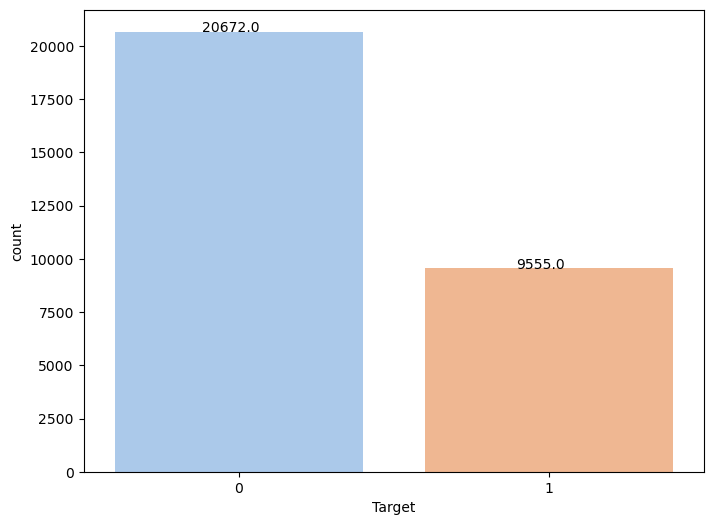

In [52]:
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['lines.linewidth'] = 1.5

def countPlot(target="Target"):
    ax = sns.countplot(x=target, data=train_labels, palette="pastel")

    for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.375, p.get_height()+0.15), ha='center')

    plt.show()

countPlot("Target")


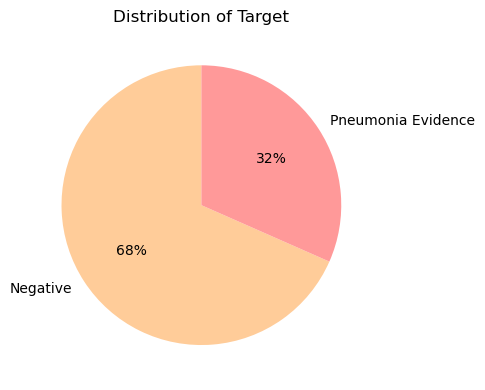

In [55]:
fig = plt.figure(figsize = (12, 4))

ax = fig.add_subplot(121)
g = (train_labels['Target'].value_counts()
    .plot(kind = 'pie', autopct = '%.0f%%', 
          labels = ['Negative', 'Pneumonia Evidence'], 
          colors = ['#ffcc99', '#ff9999'], 
          startangle = 90, 
          title = 'Distribution of Target', fontsize = 10)
    .set_ylabel(''))
plt.tight_layout()

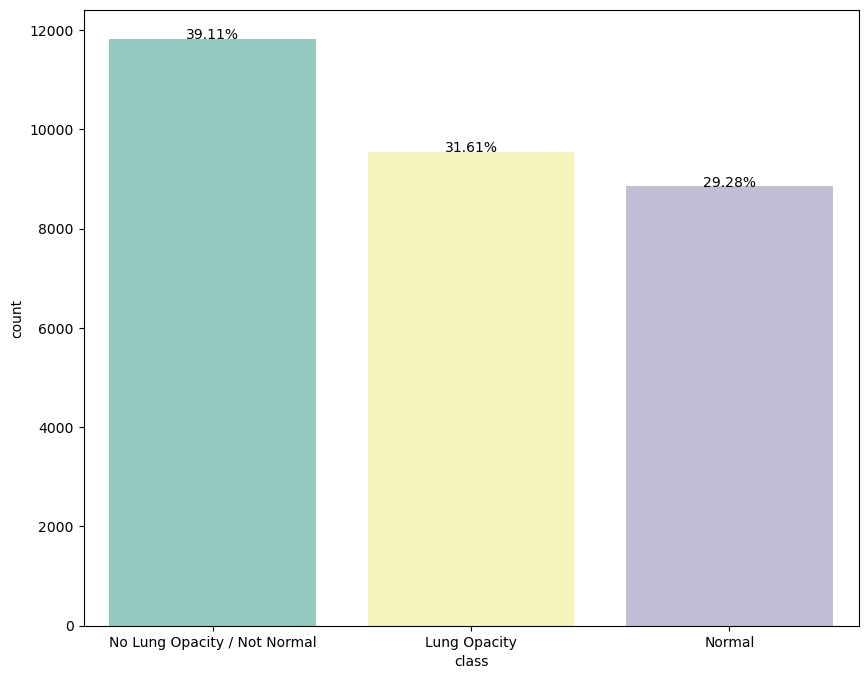

In [57]:
class_info_df = pd.DataFrame(class_info)

f, ax = plt.subplots(1, 1, figsize=(10, 8))
total = float(len(class_info_df))

sns.countplot(x='class', data=class_info_df, order=class_info_df['class'].value_counts().index, palette='Set3')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.6,
            '{:1.2f}%'.format(100 * height / total),
            ha="center")

plt.show()